# Image Processing and Analysis with ImageJ

Jan Eglinger

![FMI](http://www.fmi.ch/img/logo-FMI-grey.gif)

<small>Friedrich Miescher Institute for Biomedical Research (FMI)
Basel, Switzerland</small>


Fribourg, March 14 - 15, 2018


<small>
#### Note

The following code cell serves to initialize some utility functions that are used in the later cells of this notebook.
In order to interactively run the code in this presentation, you'll have to run the cell by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>.

If you just want to look at the slides, simply ignore it.
</small>

In [35]:
/* SciJava Script Parameters */
#@ OpService ops
#@ IOService io
#@ ImageJ ij

/* Required Imports */
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.interpolation.randomaccess.FloorInterpolatorFactory
import net.imglib2.RandomAccessibleInterval

/* Utility Functions */
tile = { images ->
  int[] gridLayout = images[0] in List ?
    [images[0].size, images.size] : // 2D images list
    [images.size] // 1D images list
  RandomAccessibleInterval[] rais = images.flatten()
  ij.notebook().mosaic(gridLayout, rais)
}

def table_image(array) {
    img = ops.create().kernel(array as double[][], new FloatType())

    return ops.run("transform.scaleView", img,
        [32,32] as double[],
        new FloorInterpolatorFactory()
    )    
}

original = io.open("images/nucleus.png")

def divide(input, n) {
    temp = ops.run("convert.float", input)
    temp2 = ops.run("eval", "image / $n", ["image": temp])
    floorOp = ops.op("floor", temp2.firstElement(), temp2.firstElement())
    floatImage = ops.run("create.img", temp)
    ops.run("map", floatImage, temp2, floorOp)
    temp3 = ops.run("eval", "image * $n", ["image": floatImage])    
    return ops.run("convert.uint8", temp3)
}

to3bit = divide(original, 32)
to2bit = divide(original, 64)
to1bit = divide(original, 128)
null

def downscale(input, n) {
    small = ops.run("transform.scaleView", input,
        [1/n,1/n] as double[],
        new FloorInterpolatorFactory()
                    )
    return ops.run("transform.scaleView", small,
        [n,n] as double[],
        new FloorInterpolatorFactory()
                   )
}

scale2 = downscale(original, 2)
scale4 = downscale(original, 4)
scale8 = downscale(original, 8)

//tile([[original, to3bit, to2bit, to1bit],[original, scale2, scale4, scale8]])
null

## Agenda

* Introduction to ImageJ / Basics of Image Processing
* Image Filtering
* Image Segmentation
* Batch Processing


### The ImageJ Main Window

![ImageJ Main Window](images/screen/imagej-main-window-annotated.png)



#### The Toolbar

* The toolbar offers selection tools as well as configurable functionality
* *Right-clicking* on a tool with a small red triangle displays more choices
* *Double-clicking* on a tool displays its options dialog

![ImageJ Toolbar](images/screen/imagej-toolbar.png)



#### Status Bar, Progress Bar and Search Bar
<small>
* The *Status Bar* displays information about the current status.
  Click the status bar to display system and memory information
* The *Progress Bar* shows up when commands are running
* The *Search Bar* lets you search:
  * all available commands
  * ImageJ forum posts
  * ImageJ wiki pages
  * much more...
</small>
![ImageJ Status Bar and Search Bar](images/screen/status-progress-search-bar.png)


#### ImageJ Menu

* Main functionality in the [User Guide](https://imagej.net/docs/guide/146.html)
* The menu is extensible by installing plugins
* Use the **Search Bar** to find commands quickly

#### ImageJ Updater

* *Help > Update...* will update ImageJ and all plugins
  (different from *Help > Update ImageJ...* which will only update core ImageJ1)
* Select the [update sites](https://imagej.net/Following_an_update_site) you need.

### Why do we need image processing?

* We can't trust our eyes...
  * *File > Open Samples*
    * Straight Lines
    * Spirals

See [this video](https://youtu.be/QCLm1PvVTY8) for some more illusions and explanations.

![Curvature Blindness Illusion](https://files.gitter.im/imagej/imagej-ops/peWw/thumb/image.png)

### Basics of Image Processing

* Digital images
* Resolution
* Bit depth
* Histograms
* Color representation


#### Digital images

A digital image is just an array of numbers:

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
| 0 | 0 | 1 | 1 | 1 | 0 | 0 |
| 0 | 1 | 2 | 2 | 2 | 1 | 0 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 0 | 1 | 2 | 2 | 2 | 1 | 0 |
| 0 | 0 | 1 | 1 | 1 | 0 | 0 |



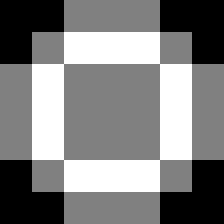

In [3]:
table = [
    [ 0, 0, 1, 1, 1, 0, 0],
    [ 0, 1, 2, 2, 2, 1, 0],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 0, 1, 2, 2, 2, 1, 0],
    [ 0, 0, 1, 1, 1, 0, 0]
]

table_image(table)

#### Exercise - Pixels
<small>
* Load the **Cell Colony** sample image (*File > Open Samples > Cell Colony (31K)*)
* Activate the **Pixel Inspector** tool by clicking on <kbd>&gt;&gt;</kbd> <kbd>Pixel Inspector</kbd>
* What is the *coordinate* of the upper left corner pixel?
* What is the *intensity* of the upper left corner pixel?
</small>
![The Pixel Inspector tool in Fiji](images/screen/fiji-toolbar-pixel-inpector.png)


#### Resolution

Optical resolution vs. Spatial sampling

Intensity sampling


#### Bit depth

example

#### Image Types in ImageJ

|  Type  |   Range               |
|--------|-----------------------|
|  8-bit |         0 - 255       |
| 16-bit |         0 - 65535     |
| 32-bit | -Infinity - +Infinity |

#### Color information

example


#### Histograms



Exercise ?

#### Exercises

* What's wrong with these sample images?


#### Dimensionality / Hyperstacks

So far, we've looked at 2D images. Scientific images can contain many more dimensions:

* Channels `c`
* Z Slices `z`
* Time frames `t`

---

*File > Open Samples > Mitosis (26MB, 5D Stack)*


![Mitosis](images/screen/imagej-hyperstack.png)

#### File formats

A word of caution: avoid JPEG, as it produces compression artifacts

* *File > Open Samples > Leaf (36K)*

### Filtering

* Convolution and kernels
* Linear filters
  * Mean filter
  * Gauss filter
  * Edge-enhancing filters
* Non-linear filters
  * Median filter
  * Minimum and maximum filters
* Binary morphological operations


#### Convolution

Digital image convolution is a process where each pixel is assigned the result of a matrix multiplication:

$result = (i)mage * (k)ernel$

$result = \begin{bmatrix}
i_{1,1} & i_{2,1} & i_{3,1} \\
i_{1,2} & i_{2,2} & i_{3,2} \\
i_{1,3} & i_{2,3} & i_{3,3}
\end{bmatrix} * \begin{bmatrix}
k_{1,1} & k_{2,1} & k_{3,1} \\
k_{1,2} & k_{2,2} & k_{3,2} \\
k_{1,3} & k_{2,3} & k_{3,3}
\end{bmatrix}
$


#### Linear filters
<small>
Identity: $\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{bmatrix}$
Mean: $\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}$
Sobel: $\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$
Laplace: $\begin{bmatrix}
0 &  1 & 0 \\
1 & -4 & 1 \\
0 &  1 & 0
\end{bmatrix}$
</small>
* Try these kernels with *Process > Filters > Convolve...*

#### Linear filters - Exercise

* Open the *boats* sample image
* How many implementations of Mean Filter are there in ImageJ? What's their difference?
* Create a Mean filter with radius 10; what are the kernel dimensions?


#### The Gaussian Filter Kernel

$\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}$

#### Linear filters in the ImageJ menu
<small>
* [*Process*](https://imagej.net/docs/guide/146-29.html#toc-Section-29)
  * *Smooth*
  * *Sharpen*
  * *Find Edges*
  * [*Filters*](https://imagej.net/docs/guide/146-29.html#toc-Subsection-29.11)
    * *Gaussian Blur...*
    * *Mean...*
</small>

#### Rank filters (non-linear filters)

* Median filter
* Minimum filter
* Maximum filter


#### Morphological operations - Exercise

* Find all vertical lines in the image

### Segmentation

* ROIs
* Masks
* Threshold
* Watershed
* Skeletonization


#### Regions Of Interest (ROI)

* ROI Manager
* Restore Selection


#### Exercise

* Measure length of larvae

### Batch processing

* Macro recorder
* Make your code generic
* Process > Batch > Macro...
* Script editor



In [3]:

#@ IOService io

println io



org.scijava.io.DefaultIOService [priority = 0.0]


In [4]:
#@ IOService io
#@ OpService ops
#@output original
#@output result2bit

original = io.open("images/nucleus.png")

temp = ops.run("convert.float", original)
temp2 = ops.run("eval", "image / 32", ["image": temp])
floorOp = ops.op("floor", temp2.firstElement(), temp2.firstElement())
floatImage = ops.run("create.img", temp)
ops.run("map", floatImage, temp2, floorOp)
temp3 = ops.run("eval", "image * 32", ["image": floatImage])

result2bit = ops.run("convert.uint8", temp3)


Key Value original <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAA/J0lEQVR42p2dUxAsS/Z3e2zbtm3btm3btm3btm3bRszbRMx7/b9VcVfHOvvWOXfme6jo7uqqrKzc+m1k5u54xzvecvzjH3854QlPuJzoRCdaTn7yky8nPvGJF89z7gQnOMFyrGMdaznSkY60HPe4x12Ofexjr7+Pecxjrge/uZ6D/zl3tKMdbTnGMY6x/qZtDtrh93GOc5z1GtrgGSc5yUnW557iFKdYn805r+Pgu8+lnZOd7GTLKU95yuXUpz71ei/P9Zlcz2/On/a0p11Od7rTrdfzHpzjO9dwrc/nmf530pOedH0W/x/5yEde34F+cw195Dra4vC5Rz3qUdfrfH8++Z+2vIY2TnOa06zP3u1263GUoxxlvY/nMLa0w3mezX1cyzmusw3a55N+c69teR+ftHX0ox99/7sHbfG8/TkGlYf4UInNA3kYg3KqU51qJQ4vz3cGn8HgWjphByU+HZdQ3McnAyiT8UwOzkl0zvNS3Mtv7+E62uQ/2+M7feQ/Gch+y0gMNkeZimsgigzJd9qUqPzmHtqQyHz3XWlfJpNpuIb35j/Hgf/pG2Mjk3G/7yJD0QfvkwYQh3My/CQi90tcCD0JfEQHbR9wjgdKDCSKTtsZHqS02xGu53/P2xk1gdK6pRG4j5fnxRk8DqWNtvzNNXznOrWAhIYBHXQO+g3hHFCZQSJwDfdy0B8YQulV86jxuN771G5qIJmWfvZctZT/2zfuVwvK3Iwf5x0fGUVmUTPalgLGfXwejOj83+Ng19D+Af8zGEqbateOQFwOO+DD+a2aU3r9zuCrvtqWB/9zKPG0T5u8qPdLSH5XPUMsJFS1r3mxD0qZkkTbnFMrwCgcmiDa8N1lZvph30sEmdD/5jUSjcN3mMTl0FzIKB0nGZZP+lJB5B6FSCJDD2jRaxxvzYkH16q9DvhPFceDOeFAqtZsXGlTvXOPpsE2VM9yt8RWSrlGtUebmg1tWvGCKppnoJmw5xyqZwet2mZKpv3EZIkD+F+tpVZRI0hkGbpjUS1iP72X5ykkNWHcq0RLYJ9T3MRvNS+/+V5h8/7iDJmE9+jhORll4g36w/c9A/AgB4uGvbCcyaeawoPr58s4WBJF2ycAUz3L+WoRwRffadeB1hQo/VyjevdlxAEyjYxYojuoDIqDJx7wGvtRQMyzuUaNw1j46ZgoFA64WkesIfPYP8dA4vuuEoZrVNOCOcdUBpcZJpGnxMuUmu0tULgTWEhw/xAXaFvtqLa5CHQyTb2EqbZ4AVU5nzIJ7UI4B0c7PNVrz9NW0T3toS0EqpyfzOT1agYJwnl+V3t5XbUH/2mLte9qHJ7FefqmGdhqp9rK/inRNWNiMDUk9/wvwI9+ekADze0Bhy/Gy3gBnxJbyVQb9Hob57uSWGBT3CADMCi6cHI77SoddRcltrbRgXBwlUC1y2TYmh+YQvygNM5rua73qZF8nhhFFaqL6D0QWJU9GWnio0q0guO7ihsUzAoE47nFBEp5pV8XUgBZT2N/r2qKQxQuIQt2lGhVv9JoB1VncqqgBWZSIgoadUdUy6rBErIYAgKe/vSn37uVum+CV3FF+6ppE+XL2ALbonzOywzeY7xA18z/lSa9Ek2TglJz6Jjo7pXoElWCC/w8ZALfjfunR1Lt2HYdf5mFz01zIShSin0JO+F/SrzXlWuLdP3Ow7nOQWJA1AAykYPTwI/gsC5lpUy7rY31fuMV5z73uZcznOEMexDG8zULHFxbb6CaTuJPnKO2aVBMZlNDFCQWGxi8UptoKmVava0tqRZr1HY3zqB5ralUoPUEpgd3OBA4QQ0vUYQpISpVEk+ilQG0cVNyDBo5EKp8Cao6VuodVDWRL2hf24fiAwGfKk9Pw74yELp/aBOYg2ghNtr77Zf2uNLlAMtcjTvIwP7vp3EKmUSGUHP6jjKVku87ynCNufScWmBqkDLAQbGCg24kbKL0Rq3ojNI5TYPnHBAxgBHGaTp0t0TZMp82XTNQO2w7gj5sOgQUPG6FWRtKliC6sLqXtEPbmqQKQ8dBhtANtO8VgsYB+B+8Q/t6GILQxi6qXepxVNX7XN9Jk+mhFhELNCZwyKihL+EAaw9FtVXZNRczauXgyrV1Dxv563kHpM9obkL0LGLvAQEhHuoeCeY319O3mgQ9Agl+xjOecQ8GizHEJA0uqQ3ryvnuSrZxAN6rwtJQOM/2GWoRCS6z+CwxjTZfLWzbMqOaTnqo1jWhNdEzKCSjr/eo0swJNAwqgRt/rkosd9ZWVoXL4SZwjMgpAarb+tvVPP4nIyiZmoNqEts0FwCDyABKIr/pp+rSELSg0+toQ0JUzVaNS2yFpRHVBqMaFdR9bfBLiWd81cISlXMG4Zq30GRo5tQAJuHEYVX/9cj2yaJyzMzqea6Ic6psmUGiNUPXgTCxosrewgLG5av6a+cLcgRAInsTSzKiBBW/VJU3wqnZkZgynZ6KeYr2tdFOCes7TmI32KNmLCissDQcbjBIoZTxqnV066TRDB8brzCrqYk087hqhmYBHcjapAZSHKBiggY0lGhtlVIjgyk5ZbAyD/8bMCmjlQGMCBZ90x8kF1PQAMzWc2TcRij7LjJUiSNzaWamG1wT4P81n8UEjV3U1Kk97Ju4oi407RrhFI85tsYI1BpGCmUAQeXMJezsjKDCQasGkHimZxvpqwdBO80aOii6MqpcXcfGEXymXoGMIMFrCrTpjQVIoNp87b6Hkb+21/SwzCl+KDNqYmhDxtO0GX7mGW1PYdIel9gS1PC1tQtTI9Ge//FsYiE+p1FXVb3SrQaYySDdxz0orHthI2oFuayZJwssVM1yp7awLkgBozECtYJcWztWF6x2vxpBhutzq4EYLLUG99BfzlmcUUxiuwVuehYWf9gXNaJMVxe2bXBvC2rUXr4boNWiE6Xd6wzGCX6nxpDJHIeq+C2Uz/+aeGncDO96XTNqqu4mWWZOX9sjR4l2HTBBXm1cYwYz+lb3zJoE1VwBanPklSYJoQlQm3GNBR66YUo413CuHkQlfBLZ//p/8yMylFpDwZnaTYIrDJo8D7VHcVA9q4NVIjX653jVQ1DjChSbI9gVrQtsmgNXZQluKrlWDKliTQ23+kfJarpXju7gVvUblZNpJtKv+va3GcDaVvtWz6Np5noKmo5qBvsztZDEkbiCM8ehIeGaFhlfqeR8K6Z8zwbFmmBrgEkGa+DMvggIS+g9wQ/TDGqDXTNNSr3cpV+qdFtRI3DS7jdEal66uX6RbV+wHN5ClDKLL8QzdM9mKLgROc5DUAdVppiM4m8HTs3lvd7fuINMoFCIM7aYsP769Jj8lAHEA4K+jk1D5Q2F12R5rUyhSRXoGRHV79cseOwmCq/kFaS1Nq+Zq6ZojaI1KNJAU8OcM8Wr1lHCmrWrJpmmiXNKM8eZznSmvR/f2IASqpbSvMxys4K/Kf1KqVFIDrWGILTJNb0qJdwxaUWS41NmnlVWaiUjmMZDyihWG7U6qPmU1hAcUDAyOUyOVW0p1c0ra3tMHonMDcD4Xc2hX8t9da+UGqt9eq+SVxVZNWn/+C4DqPInEtdL4BlqCiVdwtab8HktZCljNk1eV5T3bTJIbNKIJSjeRFXNWttpRZKE75hu5U3MDTQyW9PeJJAp5RU4yrHeOP38qhbLqFrtI2KtHZ2ZugZBBHkSGcIxKAwO34sPpgR6zlI0/WuJRvsWjSptSo81CA4qz9JDcGAlWKuEbEOGKYM0lFu0bpha0yEDcBCKtlK5jCV4U6In8Ct+qUZWQ4svmp1tnmBGBDUFu5YrGwQpYLMDdkpJk+tmWZJtqYroGNdD5DOf+cx7CS0arltS76DxBq/TbgoU1QCc43rd1OKGqvVKVPMKZgUlXEGqUsw76JPzHXMDUb1HLcD/HBKr

In [6]:
[["8 bit": original, "2 bit": result2bit]]

8 bit 2 bit <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAA/J0lEQVR42p2dUxAsS/Z3e2zbtm3btm3btm3btm3bRszbRMx7/b9VcVfHOvvWOXfme6jo7uqqrKzc+m1k5u54xzvecvzjH3854QlPuJzoRCdaTn7yky8nPvGJF89z7gQnOMFyrGMdaznSkY60HPe4x12Ofexjr7+Pecxjrge/uZ6D/zl3tKMdbTnGMY6x/qZtDtrh93GOc5z1GtrgGSc5yUnW557iFKdYn805r+Pgu8+lnZOd7GTLKU95yuXUpz71ei/P9Zlcz2/On/a0p11Od7rTrdfzHpzjO9dwrc/nmf530pOedH0W/x/5yEde34F+cw195Dra4vC5Rz3qUdfrfH8++Z+2vIY2TnOa06zP3u1263GUoxxlvY/nMLa0w3mezX1cyzmusw3a55N+c69teR+ftHX0ox99/7sHbfG8/TkGlYf4UInNA3kYg3KqU51qJQ4vz3cGn8HgWjphByU+HZdQ3McnAyiT8UwOzkl0zvNS3Mtv7+E62uQ/2+M7feQ/Gch+y0gMNkeZimsgigzJd9qUqPzmHtqQyHz3XWlfJpNpuIb35j/Hgf/pG2Mjk3G/7yJD0QfvkwYQh3My/CQi90tcCD0JfEQHbR9wjgdKDCSKTtsZHqS02xGu53/P2xk1gdK6pRG4j5fnxRk8DqWNtvzNNXznOrWAhIYBHXQO+g3hHFCZQSJwDfdy0B8YQulV86jxuN771G5qIJmWfvZctZT/2zfuVwvK3Iwf5x0fGUVmUTPalgLGfXwejOj83+Ng19D+Af8zGEqbateOQFwOO+DD+a2aU3r9zuCrvtqWB/9zKPG0T5u8qPdLSH5XPUMsJFS1r3mxD0qZkkTbnFMrwCgcmiDa8N1lZvph30sEmdD/5jUSjcN3mMTl0FzIKB0nGZZP+lJB5B6FSCJDD2jRaxxvzYkH16q9DvhPFceDOeFAqtZsXGlTvXOPpsE2VM9yt8RWSrlGtUebmg1tWvGCKppnoJmw5xyqZwet2mZKpv3EZIkD+F+tpVZRI0hkGbpjUS1iP72X5ykkNWHcq0RLYJ9T3MRvNS+/+V5h8/7iDJmE9+jhORll4g36w/c9A/AgB4uGvbCcyaeawoPr58s4WBJF2ycAUz3L+WoRwRffadeB1hQo/VyjevdlxAEyjYxYojuoDIqDJx7wGvtRQMyzuUaNw1j46ZgoFA64WkesIfPYP8dA4vuuEoZrVNOCOcdUBpcZJpGnxMuUmu0tULgTWEhw/xAXaFvtqLa5CHQyTb2EqbZ4AVU5nzIJ7UI4B0c7PNVrz9NW0T3toS0EqpyfzOT1agYJwnl+V3t5XbUH/2mLte9qHJ7FefqmGdhqp9rK/inRNWNiMDUk9/wvwI9+ekADze0Bhy/Gy3gBnxJbyVQb9Hob57uSWGBT3CADMCi6cHI77SoddRcltrbRgXBwlUC1y2TYmh+YQvygNM5rua73qZF8nhhFFaqL6D0QWJU9GWnio0q0guO7ihsUzAoE47nFBEp5pV8XUgBZT2N/r2qKQxQuIQt2lGhVv9JoB1VncqqgBWZSIgoadUdUy6rBErIYAgKe/vSn37uVum+CV3FF+6ppE+XL2ALbonzOywzeY7xA18z/lSa9Ek2TglJz6Jjo7pXoElWCC/w8ZALfjfunR1Lt2HYdf5mFz01zIShSin0JO+F/SrzXlWuLdP3Ow7nOQWJA1AAykYPTwI/gsC5lpUy7rY31fuMV5z73uZcznOEMexDG8zULHFxbb6CaTuJPnKO2aVBMZlNDFCQWGxi8UptoKmVava0tqRZr1HY3zqB5ralUoPUEpgd3OBA4QQ0vUYQpISpVEk+ilQG0cVNyDBo5EKp8Cao6VuodVDWRL2hf24fiAwGfKk9Pw74yELp/aBOYg2ghNtr77Zf2uNLlAMtcjTvIwP7vp3EKmUSGUHP6jjKVku87ynCNufScWmBqkDLAQbGCg24kbKL0Rq3ojNI5TYPnHBAxgBHGaTp0t0TZMp82XTNQO2w7gj5sOgQUPG6FWRtKliC6sLqXtEPbmqQKQ8dBhtANtO8VgsYB+B+8Q/t6GILQxi6qXepxVNX7XN9Jk+mhFhELNCZwyKihL+EAaw9FtVXZNRczauXgyrV1Dxv563kHpM9obkL0LGLvAQEhHuoeCeY319O3mgQ9Agl+xjOecQ8GizHEJA0uqQ3ryvnuSrZxAN6rwtJQOM/2GWoRCS6z+CwxjTZfLWzbMqOaTnqo1jWhNdEzKCSjr/eo0swJNAwqgRt/rkosd9ZWVoXL4SZwjMgpAarb+tvVPP4nIyiZmoNqEts0FwCDyABKIr/pp+rSELSg0+toQ0JUzVaNS2yFpRHVBqMaFdR9bfBLiWd81cISlXMG4Zq30GRo5tQAJuHEYVX/9cj2yaJyzMzqea6Ic6psmUGiNUPXgTCxosrewgLG5av6a+cLcgRAInsTSzKiBBW/VJU3wqnZkZgynZ6KeYr2tdFOCes7TmI32KNmLCissDQcbjBIoZTxqnV066TRDB8brzCrqYk087hqhmYBHcjapAZSHKBiggY0lGhtlVIjgyk5ZbAyD/8bMCmjlQGMCBZ90x8kF1PQAMzWc2TcRij7LjJUiSNzaWamG1wT4P81n8UEjV3U1Kk97Ju4oi407RrhFI85tsYI1BpGCmUAQeXMJezsjKDCQasGkHimZxvpqwdBO80aOii6MqpcXcfGEXymXoGMIMFrCrTpjQVIoNp87b6Hkb+21/SwzCl+KDNqYmhDxtO0GX7mGW1PYdIel9gS1PC1tQtTI9Ge//FsYiE+p1FXVb3SrQaYySDdxz0orHthI2oFuayZJwssVM1yp7awLkgBozECtYJcWztWF6x2vxpBhutzq4EYLLUG99BfzlmcUUxiuwVuehYWf9gXNaJMVxe2bXBvC2rUXr4boNWiE6Xd6wzGCX6nxpDJHIeq+C2Uz/+aeGncDO96XTNqqu4mWWZOX9sjR4l2HTBBXm1cYwYz+lb3zJoE1VwBanPklSYJoQlQm3GNBR66YUo413CuHkQlfBLZ//p/8yMylFpDwZnaTYIrDJo8D7VHcVA9q4NVIjX653jVQ1DjChSbI9gVrQtsmgNXZQluKrlWDKliTQ23+kfJarpXju7gVvUblZNpJtKv+va3GcDaVvtWz6Np5noKmo5qBvsztZDEkbiCM8ehIeGaFhlfqeR8K6Z8zwbFmmBrgEkGa+DMvggIS+g9wQ/TDGqDXTNNSr3cpV+qdFtRI3DS7jdEal66uX6RbV+wHN5ClDKLL8QzdM9mKLgROc5DUAdVppiM4m8HTs3lvd7fuINMoFCIM7aYsP769Jj8lAHEA4K+jk1D5Q2F12R5rUyhSRXoGRHV79cseOwmCq/kFaS1Nq+Zq6ZojaI1KNJAU8OcM8Wr1lHCmrWrJpmmiXNKM8eZznSmvR/f2IASqpbSvMxys4K/Kf1KqVFIDrWGILTJNb0qJdwxaUWS41NmnlVWaiUjmMZDyihWG7U6qPmU1hAcUDAyOUyOVW0p1c0ra3tMHonMDcD4Xc2hX8t9da+UGqt9eq+SVxVZNWn/+C4DqPInEtdL4BlqCiVdwtab8HktZCljNk1eV5T3bTJIbNKIJSjeRFXNWttpRZKE75hu5U3MDTQyW9PeJJAp5RU4yrHeOP38qhbLqFrtI2KtHZ2ZugZBBHkSGcIxKAwO34sPpgR6zlI0/WuJRvsWjSptSo81CA4qz9JDcGAlWKuEbEOGKYM0lFu0bpha0yEDcBCKtlK5jCV4U6In8Ct+qUZWQ4svmp1tnmBGBDUFu5YrGwQpYLMDdkpJk+tmWZJtqYroGNdD5DOf+cx7CS0arltS76DxBq/TbgoU1QCc43rd1OKGqvVKVPMKZgUlXEGqUsw76JPzHXMDUb1HLcD/HBKrwLdpYt3

In [7]:
dims = new long[original.numDimensions()]
original.dimensions(dims)

println dims

[128, 128]


In [8]:
#@ ImageJ ij

// Define some handy shorthands!
import net.imglib2.RandomAccessibleInterval
tile = { images ->
  int[] gridLayout = images[0] in List ?
    [images[0].size, images.size] : // 2D images list
    [images.size] // 1D images list
  RandomAccessibleInterval[] rais = images.flatten()
  ij.notebook().mosaic(gridLayout, rais)
}

Script7​$​_run​_closure1​@4e62c27

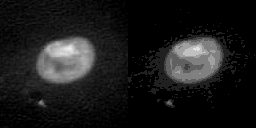

In [9]:
tile([original, result2bit])

In [10]:
#!python

b = (a for a in [1,2])


In [11]:
#!groovy

println b